In [46]:
%matplotlib notebook
import pandas as pd
import numpy as np
import collections
import random
from datetime import datetime
from pandas.tseries.offsets import MonthBegin as MS
import matplotlib.pyplot as plt


In [2]:
file = 'loto.xls'
df = pd.read_excel(file)

In [3]:
date_index =  pd.date_range('2002-01-01', '2016-12-31')

In [4]:
a = np.empty((len(date_index),1))

In [6]:
a[:]= None

In [7]:
data_loto = pd.DataFrame(data=a,index=date_index)

In [8]:
columns_month ={}
i=1
while i <=12:
    a="T"+str(i)
    columns_month[i]=a
    i+=1


In [9]:
columns_month

{1: 'T1',
 2: 'T2',
 3: 'T3',
 4: 'T4',
 5: 'T5',
 6: 'T6',
 7: 'T7',
 8: 'T8',
 9: 'T9',
 10: 'T10',
 11: 'T11',
 12: 'T12'}

In [10]:
years_row = {}
st=2002
years=str(st)
starts=0
x=1
while x <=15:
    years_row[years]=[starts,starts+31]
    starts+=31
    st+=1
    years=str(st)
    x+=1

In [11]:
years_row

{'2002': [0, 31],
 '2003': [31, 62],
 '2004': [62, 93],
 '2005': [93, 124],
 '2006': [124, 155],
 '2007': [155, 186],
 '2008': [186, 217],
 '2009': [217, 248],
 '2010': [248, 279],
 '2011': [279, 310],
 '2012': [310, 341],
 '2013': [341, 372],
 '2014': [372, 403],
 '2015': [403, 434],
 '2016': [434, 465]}

In [12]:
a= data_loto.index[0]
while a<datetime(2017,1,1): 
    years=a.strftime("%Y")
    month = a.strftime("%m")
    first_row = years_row[years][0]
    end_row = first_row + len(data_loto[years+"-"+ month])
    columns = columns_month[int(month)]
    b= df[columns][first_row:end_row]
    data_loto[0][years+"-"+ month]= np.array(b)
    #print(data_loto[0][years+"-"+ month])
    a += MS(1)                               



In [32]:
data_analysis = data_loto.dropna()

In [33]:
data_analysis["de"]=data_analysis[0].apply(lambda x:str(x)[-4:-2])

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_analysis

,0,de
2002-01-01,69855.0,55
2002-01-02,31012.0,12
2002-01-03,3953.0,53
2002-01-04,17236.0,36
2002-01-05,15170.0,70
...,...,...
2016-12-27,97291.0,91
2016-12-28,68044.0,44
2016-12-29,14198.0,98
2016-12-30,19617.0,17


In [42]:
money_start = 50
record = {}
i=0
number_wins = 1
day_lose=1
sum_day_lose = {}
while i < len(data_analysis):
    
    if data_analysis["de"][i]== "an":
        i+=1
    elif int(data_analysis["de"][i])%2==0:
        money_start = money_start*4
        day_lose+=1
        i+=1        
    else:
        record[number_wins]=[money_start, money_start*(70/50),data_for_test.index[i],day_lose]
        i+=1
        money_start=50
        number_wins+=1
        if day_lose not in sum_day_lose:
            sum_day_lose[day_lose]=1
        else:
            sum_day_lose[day_lose]+=1
        day_lose=1

In [36]:
record

{1: [50, 70.0, Timestamp('2002-01-01 00:00:00', freq='D'), 1],
 2: [200, 280.0, Timestamp('2002-01-03 00:00:00', freq='D'), 2],
 3: [800, 1120.0, Timestamp('2002-01-06 00:00:00', freq='D'), 3],
 4: [200, 280.0, Timestamp('2002-01-08 00:00:00', freq='D'), 2],
 5: [50, 70.0, Timestamp('2002-01-09 00:00:00', freq='D'), 1],
 6: [50, 70.0, Timestamp('2002-01-10 00:00:00', freq='D'), 1],
 7: [50, 70.0, Timestamp('2002-01-11 00:00:00', freq='D'), 1],
 8: [800, 1120.0, Timestamp('2002-01-14 00:00:00', freq='D'), 3],
 9: [50, 70.0, Timestamp('2002-01-15 00:00:00', freq='D'), 1],
 10: [200, 280.0, Timestamp('2002-01-17 00:00:00', freq='D'), 2],
 11: [3200, 4480.0, Timestamp('2002-01-21 00:00:00', freq='D'), 4],
 12: [50, 70.0, Timestamp('2002-01-22 00:00:00', freq='D'), 1],
 13: [50, 70.0, Timestamp('2002-01-23 00:00:00', freq='D'), 1],
 14: [50, 70.0, Timestamp('2002-01-24 00:00:00', freq='D'), 1],
 15: [3200, 4480.0, Timestamp('2002-01-28 00:00:00', freq='D'), 4],
 16: [200, 280.0, Timestamp('

{1: 1322,
 2: 652,
 3: 345,
 4: 176,
 7: 25,
 6: 42,
 5: 81,
 8: 12,
 11: 2,
 9: 8,
 10: 4}

In [37]:
result = pd.DataFrame(data=record)

In [38]:
analysis = result.T

In [70]:
analysis.index = analysis[2]

In [87]:
i=1
a=[]
while i<12:
    a.append(50**i)
    i+=1
    

In [88]:
a

[50,
 2500,
 125000,
 6250000,
 312500000,
 15625000000,
 781250000000,
 39062500000000,
 1953125000000000,
 97656250000000000,
 4882812500000000000]

<IPython.core.display.Javascript object>


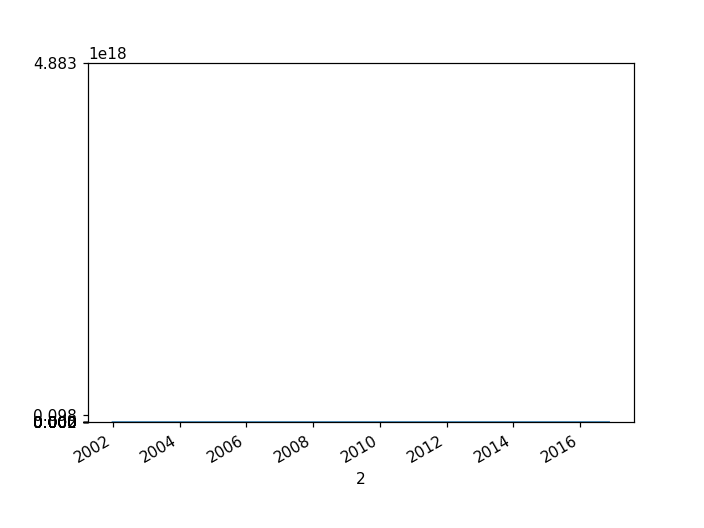

In [89]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=analysis[1], color='k', alpha=0.7)
   



In [71]:

analysis

,0,1,2,3
2,,,,
2002-01-01,50,70,2002-01-01,1
2002-01-03,200,280,2002-01-03,2
2002-01-06,800,1120,2002-01-06,3
2002-01-08,200,280,2002-01-08,2
2002-01-09,50,70,2002-01-09,1
...,...,...,...,...
2016-11-03,3200,4480,2016-11-03,4
2016-11-04,50,70,2016-11-04,1
2016-11-05,50,70,2016-11-05,1


In [59]:
ax2.plot(x=analysis[2],y=analysis[1],style="k")

TypeError: plot got an unexpected keyword argument 'x'

51